# Step 1 convection

In this notebook we will be solving the simple convection equation $$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0.$$ We will do this by discretizing the equation with a simple forward differencing in time: $$\frac{\partial u}{\partial t} \approx \frac{u(t + \Delta t) - u(t)}{\Delta t}.$$
The differentiation in space will be done with a backwards differentiation schema: $$\frac{\partial u}{\partial x} \approx \frac{u(x)-u(x-\Delta x)}{\Delta x}.$$

We will be using a index notation for the time and space steps. $u_i^n$ denotes the value of the variable u at the n-th time step and the i-th space grid node. Applyin this notation the discretized version of the equation then looks like this: $$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c\frac{u_i^n-u_{i-1}^n}{\Delta x}=0,$$
where $\Delta x$ and $\Delta t$ are the respective grid sizes of the space and time grid.

By rearranging the equation we will get a solution to update a cell at a given space node to the next time step: $$u_i^{n+1}=u_i^n-c\frac{\Delta t}{\Delta x}\left(u_i^n-u_{i-1}^n\right).$$

c*dt/dx is: 1.0


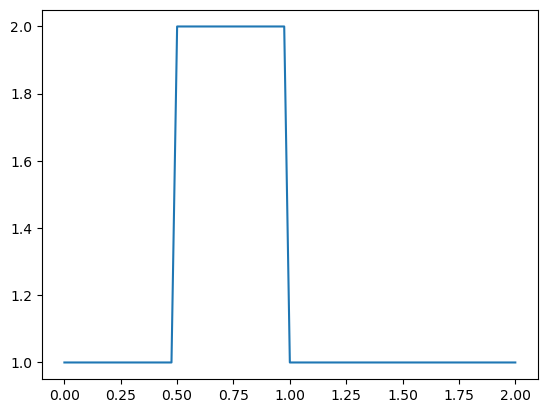

In [79]:
import numpy as np
from matplotlib import pyplot
import sys, time

%matplotlib inline

u_limit = 2 #limits the upper bound for the space grid
nx = 81 #number of space steps
dx = u_limit/(nx-1) #distance between grid points
nt = 25
dt = 1/40 #time step size
c = 1 #characteristic velocity of wave packet

c_dt_over_dx=c*dt/dx

print("c*dt/dx is:", c_dt_over_dx)

u = numpy.ones(nx) #initializing space grid with value 1 everywhere
u[int(0.5/dx):int(1/dx)] = 2 #setting everything between 0.5 and 1 in space grid to two, to have a visible difference to propagate

un = np.zeros(nx) #placerholder to make calculations, thats why not np.ones

pyplot.plot(np.linspace(0, u_limit, nx), u)

2.0


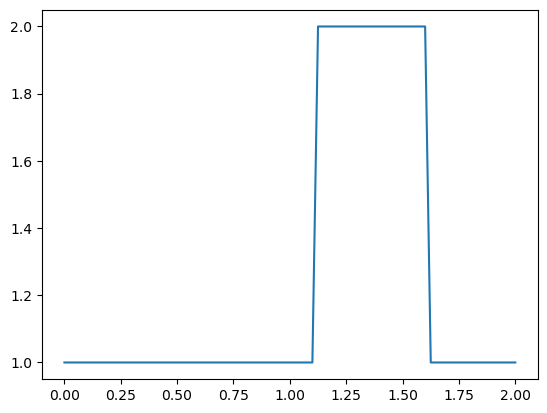

In [80]:
for n in range(nt):
    un = u.copy() #important to make a copy, otherwise its just a reference!
    for i in range(1,nx):
        u[i] = un[i] - c_dt_over_dx*(un[i] - un[i-1])
print(max(u))
pyplot.plot(np.linspace(0, u_limit, nx), u)

Changing around the values for dt, dx and c gives the following results:
If $c*dt/dx$ is 1, then the shape get's propagated and noghting changes.
If $c*dt/dx$ is smaller than 1, the shape changes to the one of a gaussian after enought iterations. **Also** the max value of u gets smaller and smaller, over the course of the evolution.
If $c*dt/dx$ is bigger than one we get distortions at the boundaries, where the functions jumps from one to two and these propagate and get bigger over time.

The conclusion is, that a value slightly less smaller than 1 seems to stabilize the algorithm, but also makes the amplitude vanish. A value bigger than 1 makes the algorithm unstable. A value of 1 just propagates the function. However there might be merits, to have $1-\epsilon$ where $\epsilon$ is a very small value. This is just a guess right now, and might become apparent in the next steps of the course. If it will, I might come back and add to this section.

The thing to take away here is